<h1 align=center><font size = 7>Linear Regression</font></h1>

## Step1: Import the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

from joblib import dump, load

## Step2: Import the Data

In [2]:
df= pd.read_csv('../input/insurance/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step3: Data overview (General information about dataset)

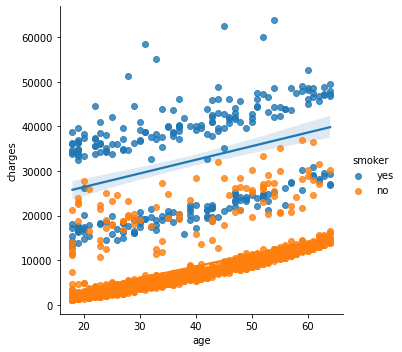

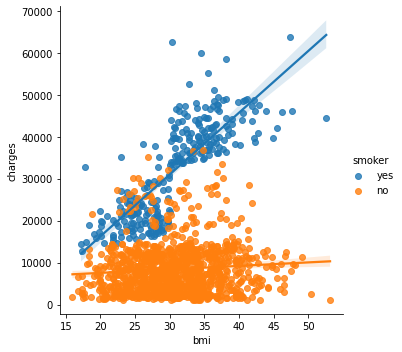

In [4]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Step4: Data preparation --> Dealing with Categorical Data

### One Hot (Encode the Categorical features)

In [6]:
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')

In [7]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [8]:
Final_df = pd.concat([df_num, df_obj], axis=1)

In [9]:
df=Final_df

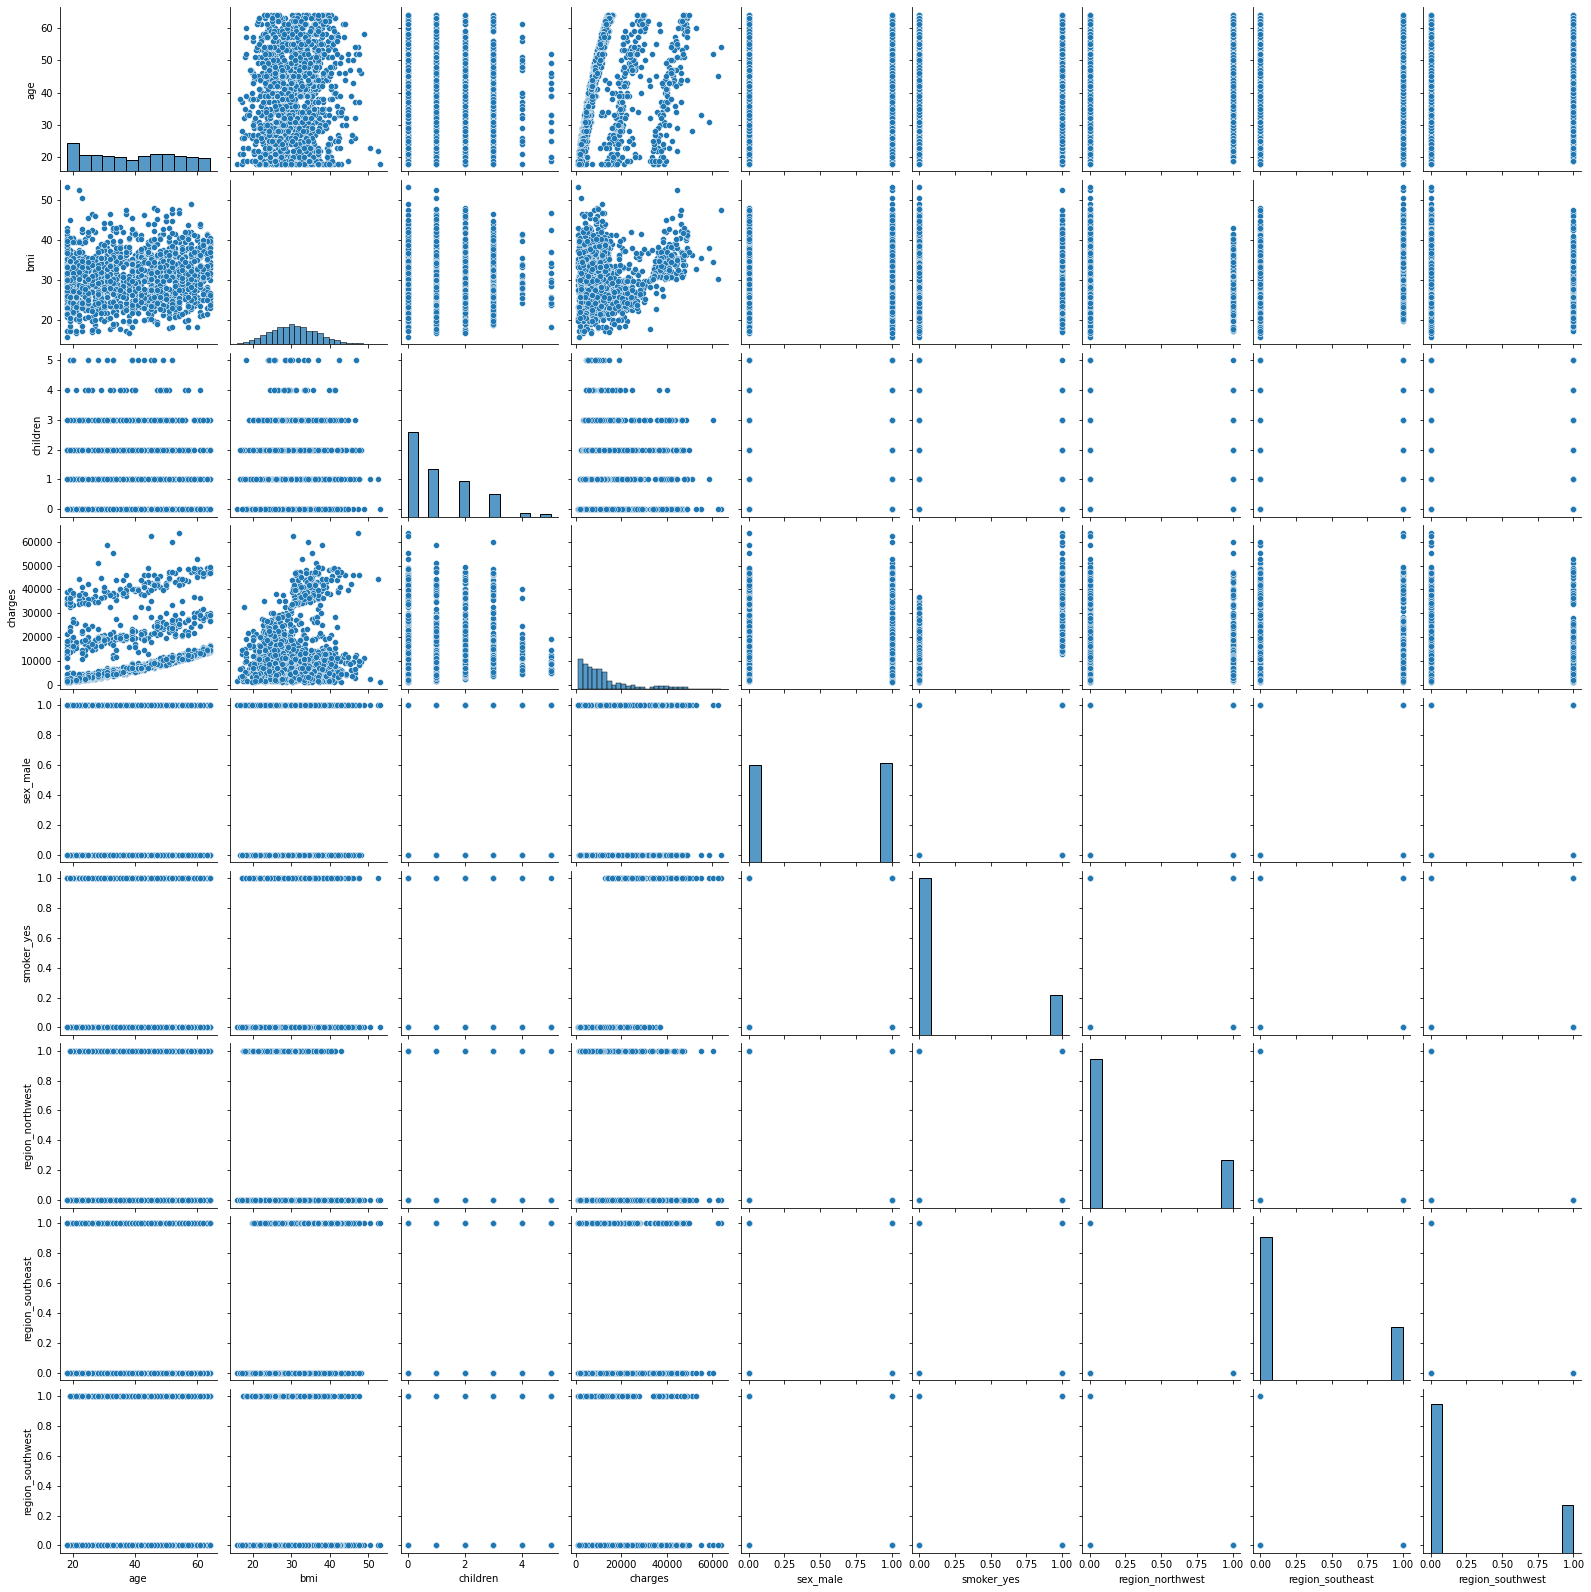

In [10]:
sns.pairplot(df)

# 📈 Training a Linear Regression Model

## Step5: Determine the Features & Target Variable

In [11]:
X=df.drop('charges', axis=1)

y=df['charges']

## Step6: Split the Dataset to Train & Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Step7: Train the Model using the X_train and y_train

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

## Step8: Coeficient Matrix (Find the coefficients)

In [15]:
model.coef_

array([  241.27878731,   367.1887526 ,   494.29061749,    52.13546398,
       23463.56486895,   169.8262773 ,  -592.94498654,  -880.64808742])

In [16]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
age,241.278787
bmi,367.188753
children,494.290617
sex_male,52.135464
smoker_yes,23463.564869
region_northwest,169.826277
region_southeast,-592.944987
region_southwest,-880.648087


## Step8: Predicting Test Data

In [17]:
y_pred = model.predict(X_test)

## Step9: Evalutaing the Model (Find the error (MSE) of the model)

In [18]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [19]:
MAE

3987.962847697629

In [20]:
MSE

33683659.32465647

In [21]:
RMSE

5803.762514494926

## Step10: Residuals (Difference between y_test and y_pred)

In [22]:
test_residual= y_test - y_pred

In [23]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'diff':(abs(y_test-y_pred))})

,Actual,Predicted,diff
44,6079.67150,10759.441911,4679.770411
134,2457.21115,2835.182618,377.971468
980,25517.11363,10364.184866,15152.928764
618,34439.85590,27052.615068,7387.240832
1238,6985.50695,6239.421703,746.085247
...,...,...,...
375,18033.96790,27017.995469,8984.027569
686,7729.64575,8207.310556,477.664806
103,30942.19180,37497.863867,6555.672067
1137,3176.28770,2045.759346,1130.528354


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


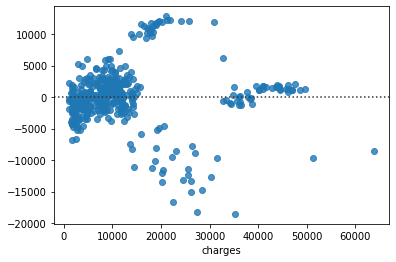

In [24]:
#residuals
sns.residplot(y_test, y_pred)  
plt.show()

## Step11: Saving and Loading the Model (Save the trained model and load that again)

In [25]:
#Save the model
final_model=LinearRegression()
final_model.fit(X_train,y_train)
dump(final_model, 'insurance')

['insurance']

In [26]:
# Load the Model:
load_model=load('insurance')

## Step12: Predict a sample  (ex: [19, 27.9, 0,0,1,0,0,1])

In [27]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [28]:
Campaign=[[32, 28.880, 0, 1, 0, 1, 0, 0]]

In [29]:
load_model.predict(Campaign)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5987.37273867])